In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import math
import os
from importlib import reload

%matplotlib inline
#%matplotlib notebook

plt.rcParams['figure.figsize'] = [7, 7]

In [2]:
def tanh(x):
    return np.tanh(x)

def dtanh(x):
    return 1 - np.power(np.tanh(x), 2)

In [3]:
def relu(x):
    return np.maximum(0, x)

def drelu(x):
    return 1*(x > 0) + 0.5*(x == 0)

In [4]:
class neuralnet:
    def __init__(self, nonlinear_func, nonlinear_func_deriv, nhiddens=2, eps=0.001):
        self.func = nonlinear_func
        self.func_deriv = nonlinear_func_deriv
        self.eps = eps
        self.V = 0.1*(2*np.random.uniform(size=(3,nhiddens))-1)
        self.W = 0.1*(2*np.random.uniform(size=(nhiddens+1,1))-1)
            
    def train(self, data_set, epochs):
        for i in range(epochs):
            Z = self.func(data_set[:, :-1].dot(self.V[1:,:]) + self.V[0,:])
            Y = Z.dot(self.W[1:,:]) + self.W[0,:]
            error = data_set[:, -1:] - Y
            
            vDelta = (error.dot(self.W[1:,:].T))*self.func_deriv(Z)
            
            self.V[1:, :] += self.eps*data_set[:, :-1].T.dot(vDelta)
            self.V[0, :] += self.eps*np.sum(vDelta, 0)

            self.W[1:, :] += self.eps*Z.T.dot(error)
            self.W[0, :] += self.eps*np.sum(error, 0)
                     
    def predict(self, data):
        intermediate = [data]
        Z = np.tanh(data.dot(self.V[1:,:]) + self.V[0,:])
        intermediate.append(Z)
        Y = Z.dot(self.W[1:,:]) + self.W[0,:]
        intermediate.append(Y)
        return 2*(intermediate[-1] > 0) - 1, intermediate
        

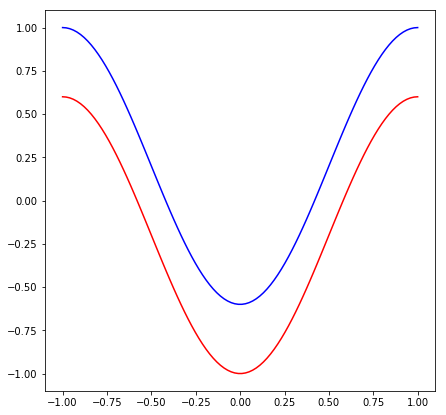

In [5]:
x = np.linspace(-1, 1, 100)
data1 = -0.8*np.cos(1*math.pi*x) - 0.2
data2 = -0.8*np.cos(1*math.pi*x) + 0.2

plt.plot(x, data1, 'r');
plt.plot(x, data2, 'b');

In [6]:
dataset = []
for i in range(len(x)):
    dataset.append(np.array([x[i], data1[i], 1]))
    dataset.append(np.array([x[i], data2[i], -1]))
dataset = np.array(dataset)

In [7]:
net = neuralnet(tanh, dtanh, nhiddens=2, eps=0.001)
net.train(dataset, 100000)

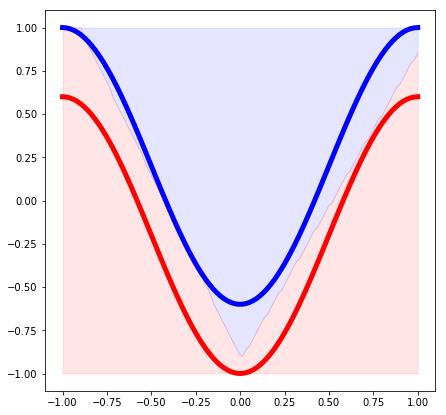

In [8]:
predicted = []
ymins = []
n = 100
for x1 in np.linspace(-1, 1, n):
    ymin = 1
    for y in np.linspace(-1.0, 1, n):
        pred = net.predict(np.array([x1, y]))
        predicted.append((x1, y, pred[0]))
        if pred[0][-1] == -1 and y < ymin:
            ymin = y
    ymins.append(ymin)

plt.fill_between(np.linspace(-1, 1, n), ymins, 1, color='b', alpha=0.1)
plt.fill_between(np.linspace(-1, 1, n), ymins, -1, color='r', alpha=0.1)

plt.plot(x, data1, 'r', linewidth=5);
plt.plot(x, data2, 'b', linewidth=5);

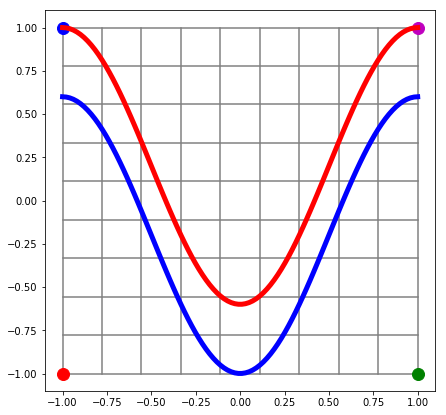

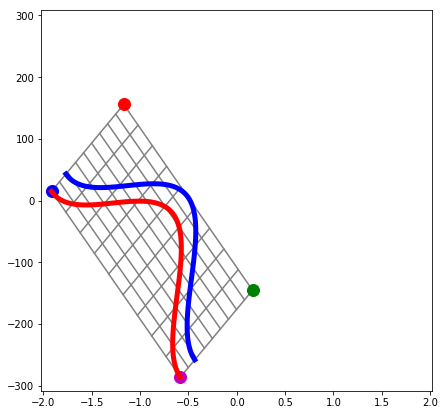

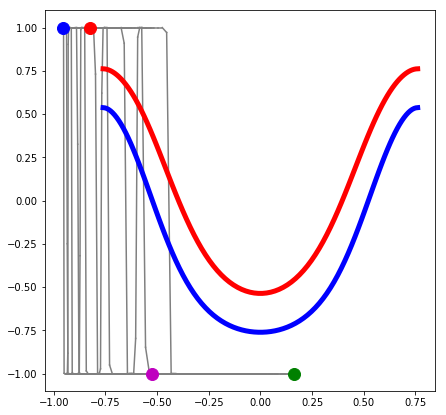

In [9]:
fig1, ax1 = plt.subplots()
for y in np.linspace(-1, 1, 10):
    ax1.plot([-1, 1], [y, y], 'gray')
    ax1.plot([y, y], [-1, 1], 'gray')
    
ax1.plot(-1, -1, 'or', markersize=12)
ax1.plot(-1, 1, 'ob', markersize=12)
ax1.plot(1, -1, 'og', markersize=12)
ax1.plot(1, 1, 'om', markersize=12)

ax1.plot(x, data1, 'b', linewidth=5)
ax1.plot(x, data2, 'r', linewidth=5)
    
fig2, ax2 = plt.subplots()
for y in np.linspace(-1, 1, 10):
    Z1 = np.array([-1, y]).dot(net.V[1:,:]) + net.V[0,:]
    Z2 = np.array([1, y]).dot(net.V[1:,:]) + net.V[0,:]
    ax2.plot([Z1[0], Z2[0]], [Z1[1], Z2[1]], 'gray')
    Z1 = np.array([y, -1]).dot(net.V[1:,:]) + net.V[0,:]
    Z2 = np.array([y, 1]).dot(net.V[1:,:]) + net.V[0,:]
    ax2.plot([Z1[0], Z2[0]], [Z1[1], Z2[1]], 'gray')

Z1 = np.array([-1, -1]).dot(net.V[1:,:]) + net.V[0,:]
ax2.plot(Z1[0], Z1[1], 'or', markersize=12)
Z1 = np.array([-1, 1]).dot(net.V[1:,:]) + net.V[0,:]
ax2.plot(Z1[0], Z1[1], 'ob', markersize=12)
Z1 = np.array([1, -1]).dot(net.V[1:,:]) + net.V[0,:]
ax2.plot(Z1[0], Z1[1], 'og', markersize=12)
Z1 = np.array([1, 1]).dot(net.V[1:,:]) + net.V[0,:]
ax2.plot(Z1[0], Z1[1], 'om', markersize=12)

d1 = np.array([[x[i], data1[i]] for i in range(len(data1))])
Z1 = np.array(d1).dot(net.V[1:,:]) + net.V[0,:]

d2 = np.array([[x[i], data2[i]] for i in range(len(data1))])
Z2 = np.array(d2).dot(net.V[1:,:]) + net.V[0,:]

ax2.plot(Z1[:, 0], Z1[:, 1], 'b', linewidth=5)
ax2.plot(Z2[:, 0], Z2[:, 1], 'r', linewidth=5)

ymin, ymax = ax2.get_ylim()
ybound = max(abs(ymin), abs(ymax))
ax2.set_ylim([-ybound, ybound])

xmin, xmax = ax2.get_xlim()
xbound = max(abs(xmin), abs(xmax))
ax2.set_xlim([-xbound, xbound])
    
fig3, ax3 = plt.subplots()
n = 50
for y in np.linspace(-1, 1, 10):
    points = np.linspace(-1, 1, n)
    for i in range(n-1):
        Z1 = tanh(np.array([points[i], y]).dot(net.V[1:,:]) + net.V[0,:])
        Z2 = tanh(np.array([points[i+1], y]).dot(net.V[1:,:]) + net.V[0,:])
        ax3.plot([Z1[0], Z2[0]], [Z1[1], Z2[1]], 'gray')
        Z1 = tanh(np.array([y, points[i]]).dot(net.V[1:,:]) + net.V[0,:])
        Z2 = tanh(np.array([y, points[i+1]]).dot(net.V[1:,:]) + net.V[0,:])
        ax3.plot([Z1[0], Z2[0]], [Z1[1], Z2[1]], 'gray')
        
Z1 = tanh(np.array([-1, -1]).dot(net.V[1:,:]) + net.V[0,:])
ax3.plot(Z1[0], Z1[1], 'or', markersize=12)
Z1 = tanh(np.array([-1, 1]).dot(net.V[1:,:]) + net.V[0,:])
ax3.plot(Z1[0], Z1[1], 'ob', markersize=12)
Z1 = tanh(np.array([1, -1]).dot(net.V[1:,:]) + net.V[0,:])
ax3.plot(Z1[0], Z1[1], 'og', markersize=12)
Z1 = tanh(np.array([1, 1]).dot(net.V[1:,:]) + net.V[0,:])
ax3.plot(Z1[0], Z1[1], 'om', markersize=12)

d1 = np.array([[x[i], data1[i]] for i in range(len(data1))])
Z1 = np.array(d1).dot(net.V[1:,:]) + net.V[0,:]

d2 = np.array([[x[i], data2[i]] for i in range(len(data1))])
Z2 = np.array(d2).dot(net.V[1:,:]) + net.V[0,:]

d1 = tanh(d1)
d2 = tanh(d2)

ax3.plot(d1[:, 0], d1[:, 1], 'b', linewidth=5)
ax3.plot(d2[:, 0], d2[:, 1], 'r', linewidth=5)

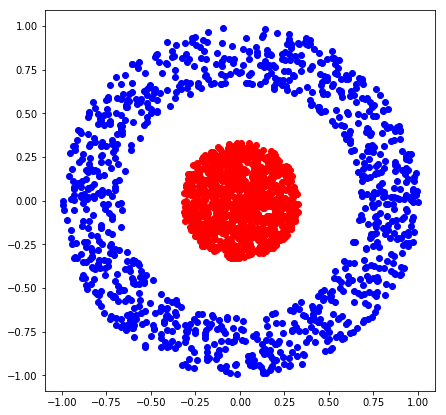

In [10]:
n = 1000
data1 = np.zeros((n, 3))
data2 = np.zeros((n, 3))
i = 0
while i < n:
    sample = 2*np.random.uniform(size=(1,2)) - 1
    if np.sum(np.square(sample)) < (1/3)**2:
        data1[i, :] = np.append(sample, [1])
        i += 1
        
i = 0
while i < n:
    sample = 2*np.random.uniform(size=(1,2)) - 1
    if (2/3)**2 < np.sum(np.square(sample)) < 1:
        data2[i, :] = np.append(sample, [-1])
        i += 1

        
fig, ax = plt.subplots()

ax.plot(data1[:, 0], data1[:, 1], 'or');
ax.plot(data2[:, 0], data2[:, 1], 'ob');

dataset = np.vstack((data1, data2))

In [28]:
f = relu
df = drelu
net = neuralnet(f, df, nhiddens=3, eps=0.001)
net.train(dataset, 10000)

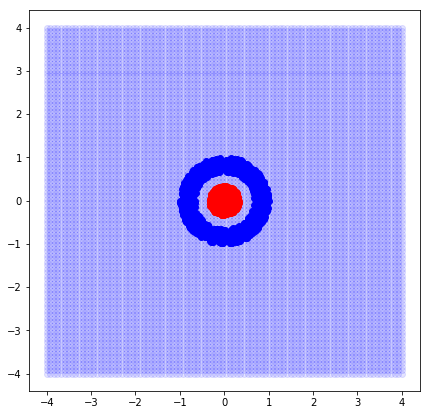

In [29]:
predicted = []
ymins = []
n = 100
for x1 in np.linspace(-4, 4, n):
    for y in np.linspace(-4, 4, n):
        pred = net.predict(np.array([x1, y]))
        predicted.append((x1, y, pred[0]))

xmin = [pred[0] for pred in predicted if pred[-1]==-1]
ymin = [pred[1] for pred in predicted if pred[-1]==-1]

xmax = [pred[0] for pred in predicted if pred[-1]==1]
ymax = [pred[1] for pred in predicted if pred[-1]==1]

fig, ax = plt.subplots()

ax.plot(xmin, ymin, 'ob', alpha=0.1)
ax.plot(xmax, ymax, 'or', alpha=0.1)

ax.plot(data1[:, 0], data1[:, 1], 'or');
ax.plot(data2[:, 0], data2[:, 1], 'ob');

In [19]:
print(net.W)
print(net.V)

[[ 3.04473675e+00]
 [-1.95660249e-12]
 [-3.41093435e-12]
 [-9.78305978e-13]]
[[-53.42492292 -86.33394758 -25.57948571]
 [ 28.61933878  45.79728138  13.54279749]
 [-45.40829416 -73.6448039  -21.83534201]]


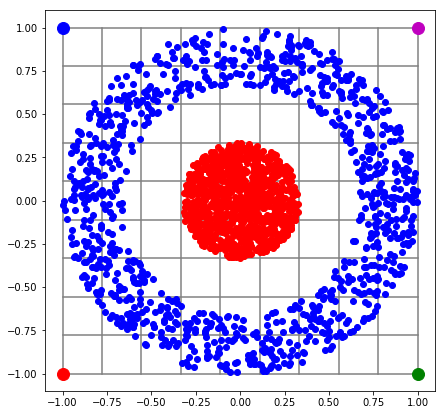

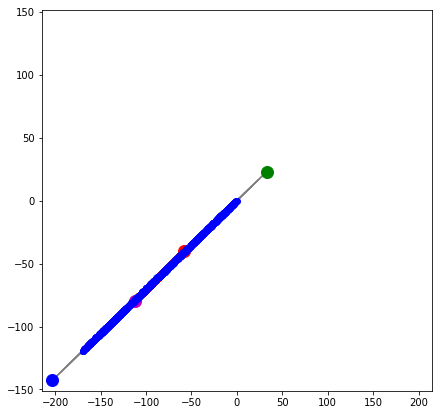

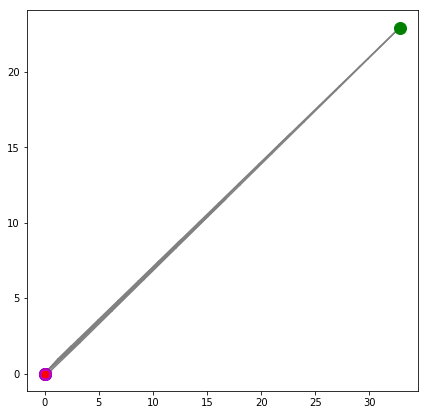

In [14]:
#%matplotlib inline

fig1, ax1 = plt.subplots()
for y in np.linspace(-1, 1, 10):
    ax1.plot([-1, 1], [y, y], 'gray')
    ax1.plot([y, y], [-1, 1], 'gray')
    
ax1.plot(-1, -1, 'or', markersize=12)
ax1.plot(-1, 1, 'ob', markersize=12)
ax1.plot(1, -1, 'og', markersize=12)
ax1.plot(1, 1, 'om', markersize=12)

plt.plot(data1[:, 0], data1[:, 1], 'or');
plt.plot(data2[:, 0], data2[:, 1], 'ob');
    
fig2, ax2 = plt.subplots()
for y in np.linspace(-1, 1, 10):
    Z1 = np.array([-1, y]).dot(net.V[1:,:]) + net.V[0,:]
    Z2 = np.array([1, y]).dot(net.V[1:,:]) + net.V[0,:]
    ax2.plot([Z1[0], Z2[0]], [Z1[1], Z2[1]], 'gray')
    Z1 = np.array([y, -1]).dot(net.V[1:,:]) + net.V[0,:]
    Z2 = np.array([y, 1]).dot(net.V[1:,:]) + net.V[0,:]
    ax2.plot([Z1[0], Z2[0]], [Z1[1], Z2[1]], 'gray')

Z1 = np.array([-1, -1]).dot(net.V[1:,:]) + net.V[0,:]
ax2.plot(Z1[0], Z1[1], 'or', markersize=12)
Z1 = np.array([-1, 1]).dot(net.V[1:,:]) + net.V[0,:]
ax2.plot(Z1[0], Z1[1], 'ob', markersize=12)
Z1 = np.array([1, -1]).dot(net.V[1:,:]) + net.V[0,:]
ax2.plot(Z1[0], Z1[1], 'og', markersize=12)
Z1 = np.array([1, 1]).dot(net.V[1:,:]) + net.V[0,:]
ax2.plot(Z1[0], Z1[1], 'om', markersize=12)

Z1 = np.array(data1[:,:-1]).dot(net.V[1:,:]) + net.V[0,:]
Z2 = np.array(data2[:,:-1]).dot(net.V[1:,:]) + net.V[0,:]

ax2.plot(Z1[:, 0], Z1[:, 1], 'ro');
ax2.plot(Z2[:, 0], Z2[:, 1], 'bo');

ymin, ymax = ax2.get_ylim()
ybound = max(abs(ymin), abs(ymax))
ax2.set_ylim([-ybound, ybound])

xmin, xmax = ax2.get_xlim()
xbound = max(abs(xmin), abs(xmax))
ax2.set_xlim([-xbound, xbound])
    
fig3, ax3 = plt.subplots()
n = 50
for y in np.linspace(-1, 1, 10):
    points = np.linspace(-1, 1, n)
    for i in range(n-1):
        Z1 = f(np.array([points[i], y]).dot(net.V[1:,:]) + net.V[0,:])
        Z2 = f(np.array([points[i+1], y]).dot(net.V[1:,:]) + net.V[0,:])
        ax3.plot([Z1[0], Z2[0]], [Z1[1], Z2[1]], 'gray')
        Z1 = f(np.array([y, points[i]]).dot(net.V[1:,:]) + net.V[0,:])
        Z2 = f(np.array([y, points[i+1]]).dot(net.V[1:,:]) + net.V[0,:])
        ax3.plot([Z1[0], Z2[0]], [Z1[1], Z2[1]], 'gray')
        
Z1 = f(np.array([-1, -1]).dot(net.V[1:,:]) + net.V[0,:])
ax3.plot(Z1[0], Z1[1], 'or', markersize=12)
Z1 = f(np.array([-1, 1]).dot(net.V[1:,:]) + net.V[0,:])
ax3.plot(Z1[0], Z1[1], 'ob', markersize=12)
Z1 = f(np.array([1, -1]).dot(net.V[1:,:]) + net.V[0,:])
ax3.plot(Z1[0], Z1[1], 'og', markersize=12)
Z1 = f(np.array([1, 1]).dot(net.V[1:,:]) + net.V[0,:])
ax3.plot(Z1[0], Z1[1], 'om', markersize=12)

Z1 = np.array(data1[:,:-1]).dot(net.V[1:,:]) + net.V[0,:]
Z2 = np.array(data2[:,:-1]).dot(net.V[1:,:]) + net.V[0,:]

Z1 = f(Z1)
Z2 = f(Z2)

ax3.plot(Z2[:, 0], Z2[:, 1], 'bo');
ax3.plot(Z1[:, 0], Z1[:, 1], 'ro');

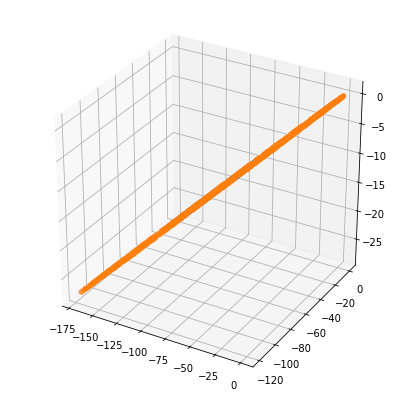

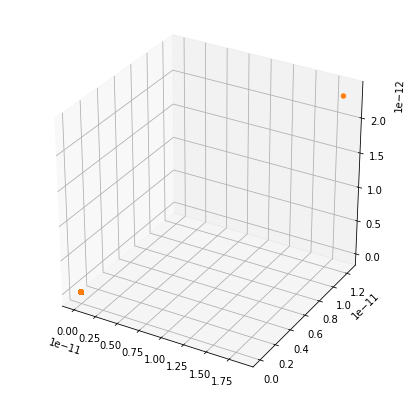

In [15]:
Z1 = np.array(data1[:,:-1]).dot(net.V[1:,:]) + net.V[0,:]

Z2 = np.array(data2[:,:-1]).dot(net.V[1:,:]) + net.V[0,:]

#reload(plt)
#%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Z1[:, 0], Z1[:, 1], Z1[:, 2], 'r');
ax.scatter(Z2[:, 0], Z2[:, 1], Z2[:, 2], 'b');


Z1 = relu(Z1)
Z2 = relu(Z2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Z1[:, 0], Z1[:, 1], Z1[:, 2], 'r');
ax.scatter(Z2[:, 0], Z2[:, 1], Z2[:, 2], 'b');